# task 2

In [13]:
import numpy as np 
import pandas as pd
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import random
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten, Conv2D, MaxPooling2D, BatchNormalization

In [3]:
real = "/Users/Sana Amir/Downloads/gender_rev2/train/female"
fake = "/Users/Sana Amir/Downloads/gender_rev2/train/male"

real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [4]:
print(len(real_path))
print(len(fake_path))

1747
1744


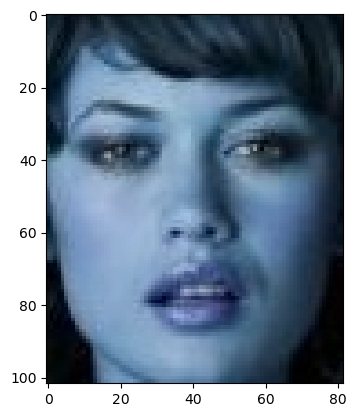

In [5]:
plt.imshow(cv2.imread(os.path.join(real, real_path[0])))

In [6]:
img_size = int(128)
def create_training_data():
    training_data = []
    y=[]
    for img in tqdm(real_path[:981]):
        path = os.path.join(real, img)
#         label = [1] 
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        training_data.append(np.array(image))
        y.append(1)
        
    for img in tqdm(fake_path[:860]):
        path = os.path.join(fake, img)
#         label = [0] 
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        training_data.append(np.array(image))  
        y.append(0)
        
    return(training_data,y)
def create_test_data():
    test_data = []
    output_data=[]
    for img in tqdm(real_path[981:]):
        path = os.path.join(real, img)
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        
        test_data.append(np.array(image))
        output_data.append(1)
        
    for img in tqdm(fake_path[860:]):
        path = os.path.join(fake, img)
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        
        test_data.append(np.array(image))
        output_data.append(0)

    return(test_data,output_data)
X_train,Y_train = create_training_data()
X_test,Y_test= create_test_data()

100%|████████████████████████████████████████████████████████████████████████████████| 884/884 [00:23<00:00, 37.74it/s]


In [7]:
l=list(zip(X_train,Y_train))
shuffle(l)
X_train,Y_train=zip(*l)

In [8]:
X_train = np.array(X_train)

#divide by 255 to squish values to 0 - 1 normalization
X_train = X_train/255.0
Y_train=np.array(Y_train)


X_test = np.array(X_test)

#divide by 255 to squish values to 0 - 1 normalization
X_test = X_test/255.0
Y_test=np.array(Y_test)


In [9]:
print(X_train.shape[1:])
print(X_train.shape[:])

(128, 128, 3)
(1841, 128, 128, 3)


In [10]:
X_train[1]

array([[[0.17647059, 0.10980392, 0.19215686],
        [0.17647059, 0.10980392, 0.19215686],
        [0.17647059, 0.10980392, 0.19215686],
        ...,
        [0.17254902, 0.1254902 , 0.20392157],
        [0.16862745, 0.11372549, 0.18431373],
        [0.16470588, 0.10196078, 0.17254902]],

       [[0.17254902, 0.10588235, 0.18823529],
        [0.17254902, 0.10588235, 0.19215686],
        [0.17647059, 0.10980392, 0.19215686],
        ...,
        [0.18039216, 0.13333333, 0.21176471],
        [0.17254902, 0.11764706, 0.19607843],
        [0.16470588, 0.10196078, 0.18431373]],

       [[0.17647059, 0.10980392, 0.18823529],
        [0.18039216, 0.11372549, 0.19215686],
        [0.18431373, 0.11764706, 0.2       ],
        ...,
        [0.19215686, 0.14117647, 0.22352941],
        [0.17647059, 0.12156863, 0.20392157],
        [0.16862745, 0.10588235, 0.19215686]],

       ...,

       [[0.80392157, 0.78823529, 0.74509804],
        [0.84313725, 0.82745098, 0.78431373],
        [0.89803922, 0

In [11]:
df=pd.DataFrame(Y_train)
df[0].value_counts()

1    981
0    860
Name: 0, dtype: int64

(128, 128, 3)

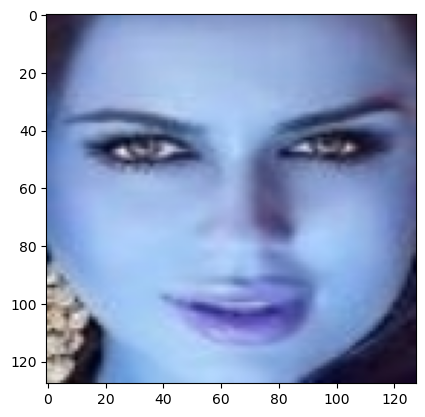

In [12]:
plt.imshow(X_train[1])
X_train[1].shape

In [14]:
model = Sequential()

model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu")) 

model.add(Conv2D(32,(3,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))

model.add(Conv2D(16,(3,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))



model.add(Flatten()) 

model.add(Dense(128,kernel_regularizer="l2"))
model.add(Activation("relu",))
model.add(Dropout(0.12))


model.add(Dense(1)) 
model.add(Activation("sigmoid"))


opt = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])

Epoch 1/15
23/23 [==============================] - 66s 2s/step - loss: 1.9472 - accuracy: 0.5401 - val_loss: 1.1132 - val_accuracy: 0.5014
Epoch 2/15
23/23 [==============================] - 55s 2s/step - loss: 0.8586 - accuracy: 0.6209 - val_loss: 0.6674 - val_accuracy: 0.7317
Epoch 3/15
23/23 [==============================] - 51s 2s/step - loss: 0.6277 - accuracy: 0.7337 - val_loss: 0.5857 - val_accuracy: 0.7480
Epoch 4/15
23/23 [==============================] - 51s 2s/step - loss: 0.5092 - accuracy: 0.8037 - val_loss: 0.5062 - val_accuracy: 0.7778
Epoch 5/15
23/23 [==============================] - 51s 2s/step - loss: 0.4414 - accuracy: 0.8424 - val_loss: 0.4211 - val_accuracy: 0.8780
Epoch 6/15
23/23 [==============================] - 54s 2s/step - loss: 0.3739 - accuracy: 0.8852 - val_loss: 0.3664 - val_accuracy: 0.8808
Epoch 7/15
23/23 [==============================] - 72s 3s/step - loss: 0.3472 - accuracy: 0.8913 - val_loss: 0.3844 - val_accuracy: 0.8780
Epoch 8/15
23/23 [==

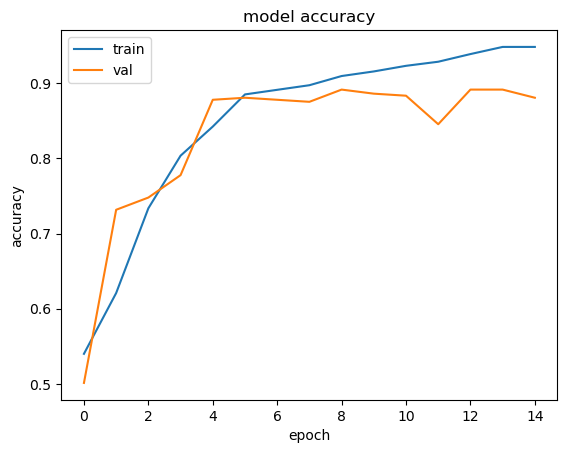

In [15]:
history=model.fit(X_train,Y_train, batch_size = 64, epochs = 15, validation_split = 0.2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
model.evaluate(X_test,Y_test)

52/52 [==============================] - 17s 286ms/step - loss: 0.3559 - accuracy: 0.8848


[0.35590410232543945, 0.8848484754562378]

In [17]:
model.save('my_finalised_cnn', save_format='tf')

INFO:tensorflow:Assets written to: my_finalised_cnn\assets


INFO:tensorflow:Assets written to: my_finalised_cnn\assets


In [18]:
trained_model = keras.models.load_model('my_finalised_cnn') 
print (trained_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 64)        0         
 D)                                                              
                                                                 
 activation (Activation)     (None, 63, 63, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0